### Imports and requierments

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn, Tensor
import tifffile
import tensorflow as tf
import os
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import time
from PIL import Image
# Common
import os
import keras
import numpy as np
from glob import glob
from tqdm import tqdm
from numpy import zeros
import tensorflow as tf
from numpy.random import randint

from sklearn.metrics import accuracy_score, jaccard_score
# Data
from tensorflow.image import resize
from tensorflow.keras.utils import load_img, img_to_array

# Data Viz
import matplotlib.pyplot as plt

# Model
from keras.layers import ReLU
from keras.models import Model
from keras.layers import Input
from keras.layers import Layer
from keras.layers import Conv2D
from keras.layers import Dropout
from keras.layers import LeakyReLU
from keras.layers import Concatenate, concatenate
from keras.layers import ZeroPadding2D
from keras.layers import Conv2DTranspose
from keras.layers import BatchNormalization

# Callbacks
from keras.callbacks import Callback

# Model Viz
from tensorflow.keras.utils import plot_model

#from google.colab import drive
#drive.mount('/content/drive')

import os
os.listdir('/kaggle/input')

### Loading the images

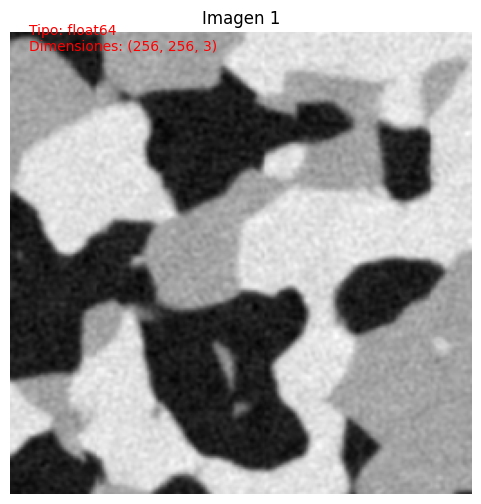

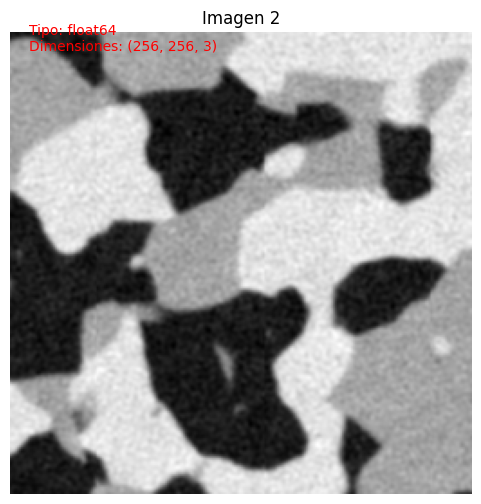

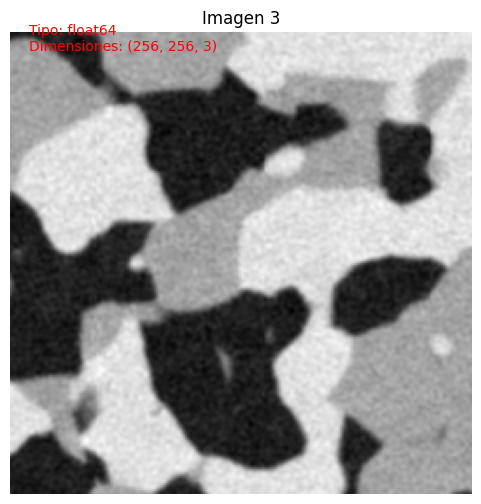

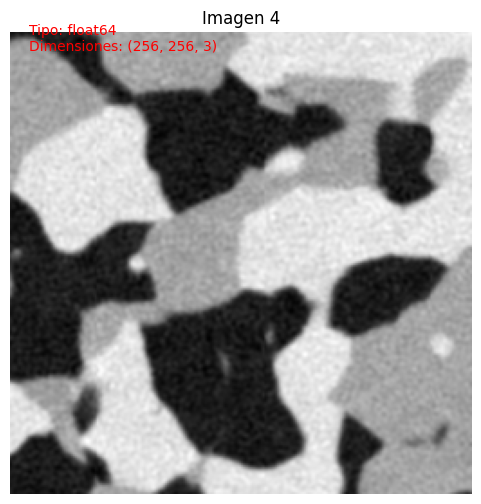

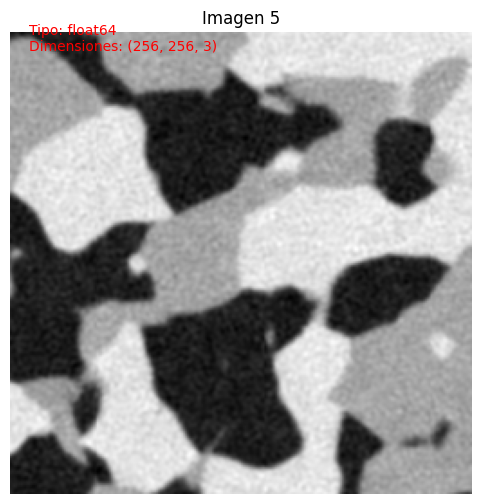

In [3]:
import tifffile
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Define the target size
target_size = (256, 256)

directorio_imagenes = r"/kaggle/input/dl-project-dtu/data/"
imagenes = []

inicio = 1  # Número de la primera imagen
fin = 500  # Número de la última imagen

for i in range(inicio, fin + 1):
    nombre_archivo = f"SOCprist{i:04d}.tiff"
    ruta_imagen = directorio_imagenes + nombre_archivo

    imagen_tiff = tifffile.imread(ruta_imagen)

    # Crop and resize the image to 256x256
    y_start, x_start = (501 - 256) // 2, (501 - 256) // 2
    imagen_tiff = imagen_tiff[y_start:y_start+256, x_start:x_start+256]

    # Expand dimensions to (256, 256, 1) to indicate a single channel
    imagen_tiff = np.expand_dims(imagen_tiff, axis=-1)

    # Repeat the single channel to create a (256, 256, 3) image
    imagen_tiff = np.repeat(imagen_tiff, 3, axis=-1)

    # Normalize the image data to the range [0, 1]
    imagen_tiff = (imagen_tiff - np.min(imagen_tiff)) / (np.max(imagen_tiff) - np.min(imagen_tiff))

    imagenes.append(imagen_tiff)

primeras_5_imagenes = imagenes[:5]

for i, imagen in enumerate(primeras_5_imagenes):
    plt.figure(figsize=(6, 6))
    plt.imshow(imagen)
    plt.title(f"Imagen {i + 1}")
    plt.axis('off')

    tipo_imagen = imagen.dtype
    dimensiones_imagen = imagen.shape
    plt.text(10, 10, f"Tipo: {tipo_imagen}\nDimensiones: {dimensiones_imagen}", color='red', fontsize=10)

plt.show()


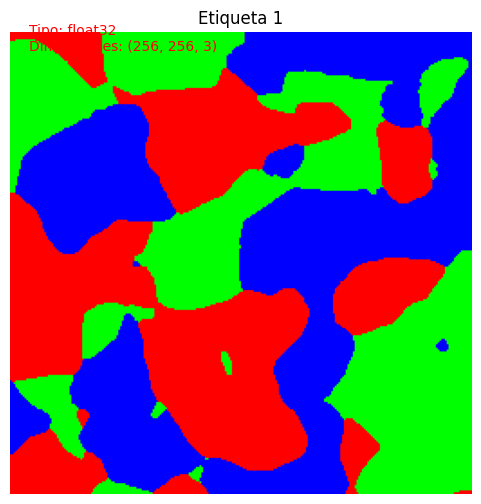

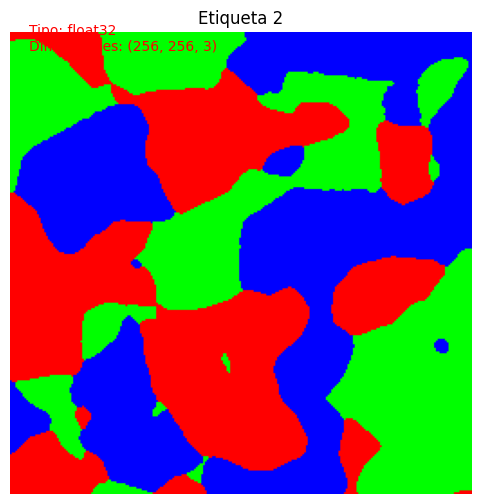

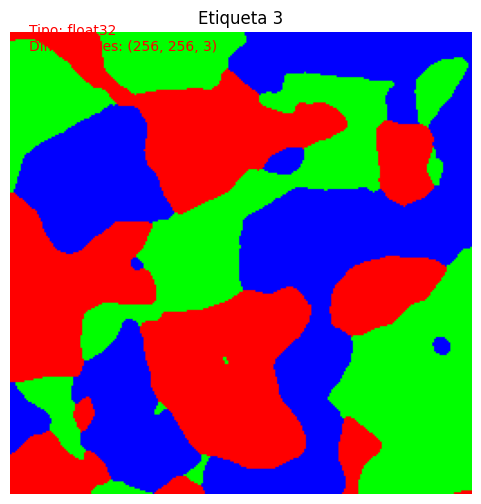

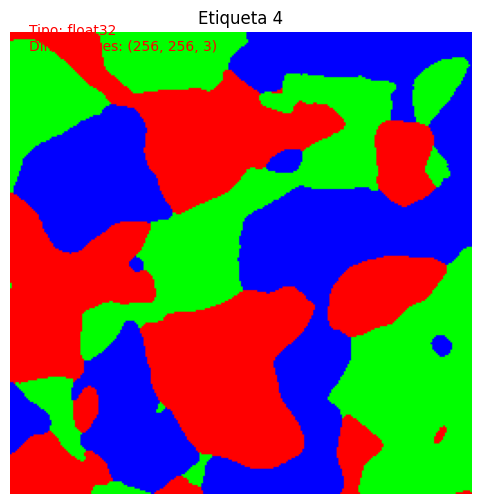

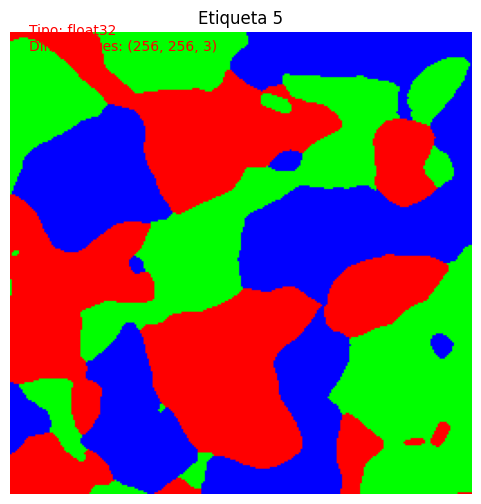

In [4]:
from tensorflow.keras.utils import to_categorical

# Define the target size
target_size = (256, 256)

directorio_etiquetas = r"/kaggle/input/dl-project-dtu/labels/"
etiquetas = []
etiquetas_init = []

inicio = 1  # Número de la primera etiqueta
fin = 500  # Número de la quinta etiqueta

for i in range(inicio, fin + 1):
    nombre_archivo = f"slice__{i:03d}.tif"
    ruta_etiqueta = directorio_etiquetas + nombre_archivo

    etiqueta_tiff = tifffile.imread(ruta_etiqueta)

    # Crop and resize the label to 256x256
    y_start, x_start = (501 - 256) // 2, (501 - 256) // 2
    etiqueta_tiff = etiqueta_tiff[y_start:y_start+256, x_start:x_start+256]
 
    # Normalize the image data to the range [0, 1]
    etiqueta_tiff = (etiqueta_tiff - np.min(etiqueta_tiff)) / (np.max(etiqueta_tiff) - np.min(etiqueta_tiff))
    
    
    etiquetas_init.append(etiqueta_tiff)
        
       # Convert float masks to integers
    etiqueta_tiff = (etiqueta_tiff * 2).astype(int)

    

    num_classes = 3  # Three classes: 0, 1, and 2
    etiqueta_tiff = to_categorical(etiqueta_tiff, num_classes=num_classes)


    etiquetas.append(etiqueta_tiff)

primeras_5_etiquetas = etiquetas[:5]
p_5_init = etiquetas_init[:5]

for i, etiqueta in enumerate(primeras_5_etiquetas):
    plt.figure(figsize=(6, 6))
    plt.imshow(etiqueta, cmap='gray')
    plt.title(f"Etiqueta {i + 1}")
    plt.axis('off')

    tipo_etiqueta = etiqueta.dtype
    dimensiones_etiqueta = etiqueta.shape
    plt.text(10, 10, f"Tipo: {tipo_etiqueta}\nDimensiones: {dimensiones_etiqueta}", color='red', fontsize=10)

plt.show()

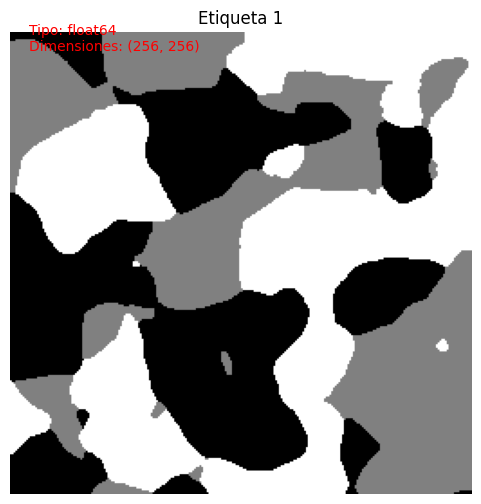

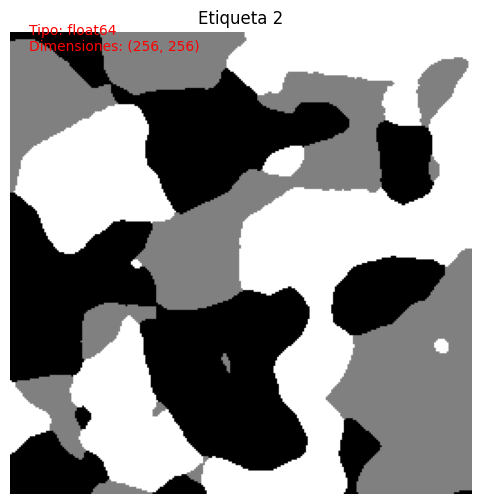

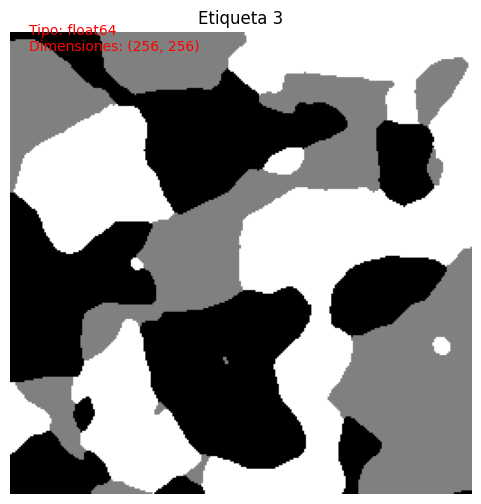

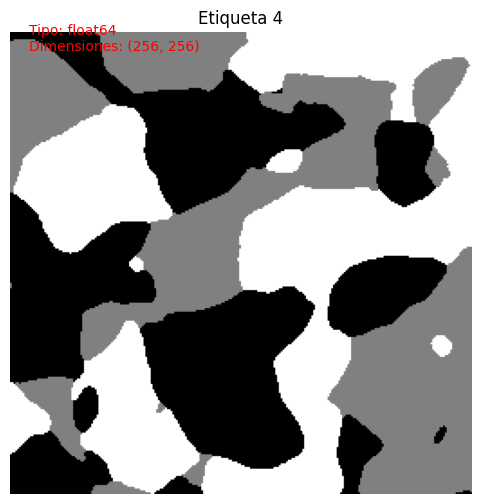

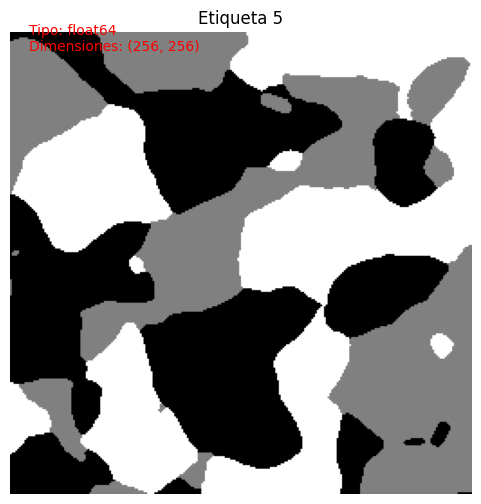

In [5]:
for i, etiqueta in enumerate(p_5_init):
    plt.figure(figsize=(6, 6))
    plt.imshow(etiqueta, cmap='gray')
    plt.title(f"Etiqueta {i + 1}")
    plt.axis('off')

    tipo_etiqueta = etiqueta.dtype
    dimensiones_etiqueta = etiqueta.shape
    plt.text(10, 10, f"Tipo: {tipo_etiqueta}\nDimensiones: {dimensiones_etiqueta}", color='red', fontsize=10)

plt.show()

In [6]:
images = np.array(imagenes)
images.shape
masks = np.array(etiquetas)
masks.shape

(500, 256, 256, 3)

In [7]:
images.shape

(500, 256, 256, 3)

In [ ]:
def load_image(path):
    img = tifffile.imread(path).astype(np.float64)
    imagen_tiff = np.expand_dims(img, axis=-1)
    imagen_tiff = resize(imagen_tiff, (256,256))

   # # Expand dimensions to (256, 256, 1) to indicate a single channel
    

    # Repeat the single channel to create a (256, 256, 3) image
    imagen_tiff = np.repeat(imagen_tiff, 3, axis=-1)

    # Normalize the image data to the range [0, 1]
    imagen_tiff = (imagen_tiff - np.min(imagen_tiff)) / (np.max(imagen_tiff) - np.min(imagen_tiff))
   
    return imagen_tiff

def show_image(image, title=None):
    plt.imshow(image,cmap="")
    plt.title(title)
    plt.axis('off')

In [ ]:
def load_image(path):
    img = load_img(path)
    img = img_to_array(img)/255.
    img = resize(img, (256,256))
    img = tf.cast(img, tf.float32) # This step is not necessary
    return img

### Functions Used

In [29]:
import numpy as np

def post_process_mask(mask):
    mask = mask.astype(np.float64)
    # Set values less than 0.25 to 0, values between 0.25 and 0.75 to 0.5, and values greater than 0.75 to 1
    processed_mask = np.where(mask < 0.25, 0, np.where(mask < 0.75, 0.50196078, 1))
    return processed_mask


def dice_coefficient(pred_mask, true_mask):
    intersection = np.sum(pred_mask * true_mask)
    union = np.sum(pred_mask) + np.sum(true_mask)
    dice = (2.0 * intersection) / union if union > 0 else 1.0
    return dice

def jaccard(pred_mask,true_mask):
    img_true=np.array(true_mask).ravel()
    img_pred=np.array(pred_mask).ravel()
    iou = jaccard_score(img_true, img_pred)
    return iou

def show_image(image, title=None):
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    
def show_images(n_images=5):
    for i in range(n_images):

        id = randint(len(train_images))
        image, mask = train_images[id], train_masks[id]

        plt.figure(figsize=(10,8))

        plt.subplot(1,2,1)
        show_image(image)

        plt.subplot(1,2,2)
        show_image(mask)

        plt.show()
        

def show_predictions_train(model, n_images,n_images_disp):
    dice_coefficients = []
    iou_coefficients =[]
        
    for i in range(n_images):
        image, mask = train_images[i], train_masks[i]
        pred_mask = model.predict(image[np.newaxis,...])[0]
        pred_mask = pred_mask.astype('float64')
        dice_coefficients.append(dice_coefficient(pred_mask,mask))  
 
    dice_coefficients = np.array(dice_coefficients)
    iou_coefficients = np.array(iou_coefficients)
    dice_mean = np.mean(dice_coefficients)
    dice_std = np.std(dice_coefficients,ddof=1)
    dice_median = np.median(dice_coefficients)
    dice_1stquartile = np.percentile(dice_coefficients, 25)
    dice_3rdquartile = np.percentile(dice_coefficients,75) 
    print(f'Results from the training set. Mean +- STD: {dice_mean} +- {dice_std}, Median:{dice_median} [{dice_1stquartile},{dice_3rdquartile}]')
    
    return dice_mean,dice_std,dice_median, dice_1stquartile, dice_3rdquartile
        
        
        
def reverse_one_hot_encoding(one_hot_encoded_mask):
    return np.argmax(one_hot_encoded_mask, axis=-1)

def to_grayscale(label_image):
    # Convert label image to grayscale by taking the first channel
    return label_image[:, :, 0]



def show_predictions_test(model, n_images,n_images_disp):
    dice_coefficients = []
                
    for i in range(n_images):

        
        image, mask = test_images[i], test_masks[i]
        pred_mask = model.predict(image[np.newaxis,...])[0]
        pred_mask = pred_mask.astype('float64')
        pred_mask = post_process_mask(pred_mask)
        #print(f'Dice Coefficient {dice_coefficient(pred_mask,mask)}')
        dice_coefficients.append(dice_coefficient(pred_mask,mask))  
 
    dice_coefficients = np.array(dice_coefficients)
    dice_mean = np.mean(dice_coefficients)
    dice_std = np.std(dice_coefficients,ddof=1)
    dice_median = np.median(dice_coefficients)
    dice_1stquartile = np.percentile(dice_coefficients,25) 
    dice_3rdquartile = np.percentile(dice_coefficients,75) 
    print(f'Results from the test set. Mean +- STD: {dice_mean} +- {dice_std}, Median:{dice_median} [{dice_1stquartile},{dice_3rdquartile}]')
    return dice_mean,dice_std,dice_median, dice_1stquartile, dice_3rdquartile

    
def show_predictions_val(model, n_images,n_images_disp):
    dice_coefficients = []
    
    for i in range(n_images):

        id = randint(len(val_images))
        image, mask = val_images[id], val_masks[id]
        pred_mask = model.predict(image[np.newaxis,...])[0]
        #print(f'Dice Coefficient {dice_coefficient(pred_mask,mask)}')
        dice_coefficients.append(dice_coefficient(pred_mask,mask))
        print(mask.shape)

        
    dice_coefficients = np.array(dice_coefficients)
    dice_mean = np.mean(dice_coefficients)
    dice_std = np.std(dice_coefficients,ddof=1)
    dice_median = np.median(dice_coefficients)
    dice_1stquartile = np.percentile(dice_coefficients,25) 
    dice_3rdquartile = np.percentile(dice_coefficients,75) 
    print(f'Results from the validation set. Mean +- STD: {dice_mean} +- {dice_std}, Median:{dice_median}[{dice_1stquartile},{dice_3rdquartile}]')
    
    return dice_mean,dice_std,dice_median,dice_1stquartile, dice_3rdquartile

In [ ]:
show_predictions_test(generator, n_images=100,n_images_disp = 5)

In [ ]:
def reverse_one_hot_encoding(one_hot_encoded_mask):
    return np.argmax(one_hot_encoded_mask, axis=-1)


def show_predictions_train(model, n_images_disp, n_images_eval):
    dice_coefficients = []

    for i in range(n_images_eval):
        # Evaluate model
        id = randint(len(train_images))
        image, mask = train_images[id], train_masks[id]
        pred_mask = model.predict(image[np.newaxis, ...])[0]
        pred_mask = pred_mask.astype('float64')

        dice_coefficients.append(dice_coefficient(pred_mask, mask))

    dice_coefficients = np.array(dice_coefficients)
    dice_mean = np.mean(dice_coefficients)
    dice_std = np.std(dice_coefficients, ddof=1)
    dice_median = np.median(dice_coefficients)
    dice_1stquartile = np.percentile(dice_coefficients, 25)
    dice_3rdquartile = np.percentile(dice_coefficients, 75)

    print(f'Results from the test set. Mean +- STD: {dice_mean} +- {dice_std}, Median: {dice_median} [{dice_1stquartile},{dice_3rdquartile}]')

    return dice_mean, dice_std, dice_median, dice_1stquartile, dice_3rdquartile

# Pix2Pix Architecture 

In [9]:
class Encoder(Layer):
    def __init__(self, filters, apply_norm=True, **kwargs):
        super(Encoder, self).__init__(**kwargs)

        self.filters = filters
        self.apply_norm = apply_norm

        self.c1 = Conv2D(filters, kernel_size=3, strides=2, padding='same', kernel_initializer='he_normal')
        self.bn = BatchNormalization()
        self.act = LeakyReLU()

    def call(self, X):
        x = self.c1(X)
        if self.apply_norm:
            x = self.bn(x)
        x = self.act(x)
        return x

    def get_config(self):
        base_config = super().get_config()
        return {
            **base_config,
            "filters": self.filters,
            "apply_norm": self.apply_norm
        }

class Decoder(Layer):
    def __init__(self, filters, apply_dropout=False, **kwargs):
        super(Decoder, self).__init__(**kwargs)

        self.filters = filters
        self.apply_dropout = apply_dropout

        self.cT = Conv2DTranspose(filters, kernel_size=3, strides=2, padding='same', kernel_initializer='he_normal')
        self.bn = BatchNormalization()
        self.drop = Dropout(0.5)
        self.act = ReLU()

    def call(self, X):
        x = self.cT(X)
        x = self.bn(x)
        if self.apply_dropout:
            x = self.drop(x)
        x = self.act(x)
        return x

    def get_config(self):
        base_config = super().get_config()
        return {
            **base_config,
            "filters": self.filters,
            "apply_dropout": self.apply_dropout
        }

class ResBlock(Layer):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResBlock, self).__init__()

        self.layer = tf.keras.Sequential([
            Conv2D(out_channels, kernel_size=3, padding='same', strides=stride, use_bias=False),
            BatchNormalization(),
            ReLU(),
            Conv2D(out_channels, kernel_size=3, padding='same', strides=1, use_bias=False),
            BatchNormalization(),
            ReLU()
        ])

        self.identity_map = Conv2D(out_channels, kernel_size=1, strides=stride, use_bias=False)
        self.relu = ReLU()

    def call(self, inputs):
        x = tf.identity(inputs)
        out = self.layer(x)
        residual = self.identity_map(inputs)
        skip = out + residual
        return self.relu(skip)

# Inputs
gen_input = Input(shape=(256, 256, 3), name="Input")

# Encoder - Downsampling Phase
c1 = Encoder(64, apply_norm=False, name="Encoder1")(gen_input)
c2 = Encoder(128, name="Encoder2")(c1)
c3 = Encoder(256, name="Encoder3")(c2)
c4 = Encoder(512, name="Encoder4")(c3)
c5 = Encoder(512, name="Encoder5")(c4)
c6 = Encoder(512, name="Encoder6")(c5)

# Encoding - Latent Representation
e = Encoder(512, name="Encoding")(c6)

# Residual Blocks
res1 = ResBlock(512, 512, stride=1)(e)
res2 = ResBlock(512, 512, stride=1)(res1)
res3 = ResBlock(512, 512, stride=1)(res2)

# Decoder - Upsampling Phase
d1 = Decoder(512, apply_dropout=True, name="Decoder1")(res3)
a1 = concatenate([d1, c6])

d2 = Decoder(512, apply_dropout=True, name="Decoder2")(a1)
a2 = concatenate([d2, c5])

d3 = Decoder(512, apply_dropout=True, name="Decoder3")(a2)
a3 = concatenate([d3, c4])

d4 = Decoder(512, name="Decoder4")(a3)
a4 = concatenate([d4, c3])

d5 = Decoder(256, name="Decoder5")(a4)
a5 = concatenate([d5, c2])

d6 = Decoder(128, name="Decoder6")(a5)
a6 = concatenate([d6, c1])

d7 = Decoder(64, name="Decoder7")(a6)

init = tf.random_normal_initializer(stddev=0.02)
gen_out = Conv2D(3, kernel_size=1, strides=1, padding='same', activation='softmax', kernel_initializer=init, name="gen_out")(d7)

# Model
generator = Model(
    inputs=gen_input,
    outputs=gen_out,
    name="Generator"
)

# Compiling
generator.compile(
    loss='categorical_crossentropy',
    optimizer='adam'
)

def DiscriminatorBlock(x, filters, batch_norm=True):
    x = Conv2D(filters, kernel_size=3, strides=2, padding='same', use_bias=False)(x)
    if batch_norm:
        x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.2)(x)
    return x

def Discriminator():
    init = tf.random_normal_initializer(stddev=0.02)

    src_img = Input(shape=(256, 256, 3), name="SourceImage")
    gen_img = Input(shape=(256, 256, 3), name="GenImage")

    # Concatenate source and generated images along the channels axis
    x = Concatenate(axis=-1)([src_img, gen_img])

    # Downsample the image using convolutional blocks
    x = DiscriminatorBlock(x, 64, batch_norm=False)
    x = DiscriminatorBlock(x, 128)
    x = DiscriminatorBlock(x, 256)
    x = DiscriminatorBlock(x, 512)

    # Zero-padding block
    x = ZeroPadding2D()(x)

    # Output layer
    patch_out = Conv2D(1, kernel_size=4, strides=1, padding='valid', kernel_initializer=init)(x)

    return Model(inputs=[src_img, gen_img], outputs=patch_out, name="Discriminator")

# Instantiate the discriminator model
discriminator = Discriminator()
discriminator.summary()

Model: "Discriminator"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 SourceImage (InputLayer)       [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 GenImage (InputLayer)          [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 concatenate_6 (Concatenate)    (None, 256, 256, 6)  0           ['SourceImage[0][0]',            
                                                                  'GenImage[0][0]']   

In [10]:
pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 17.0 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import visualkeras
visualkeras.layered_view(generator, to_file='/kaggle/working/generator_legend.png',legend=True)

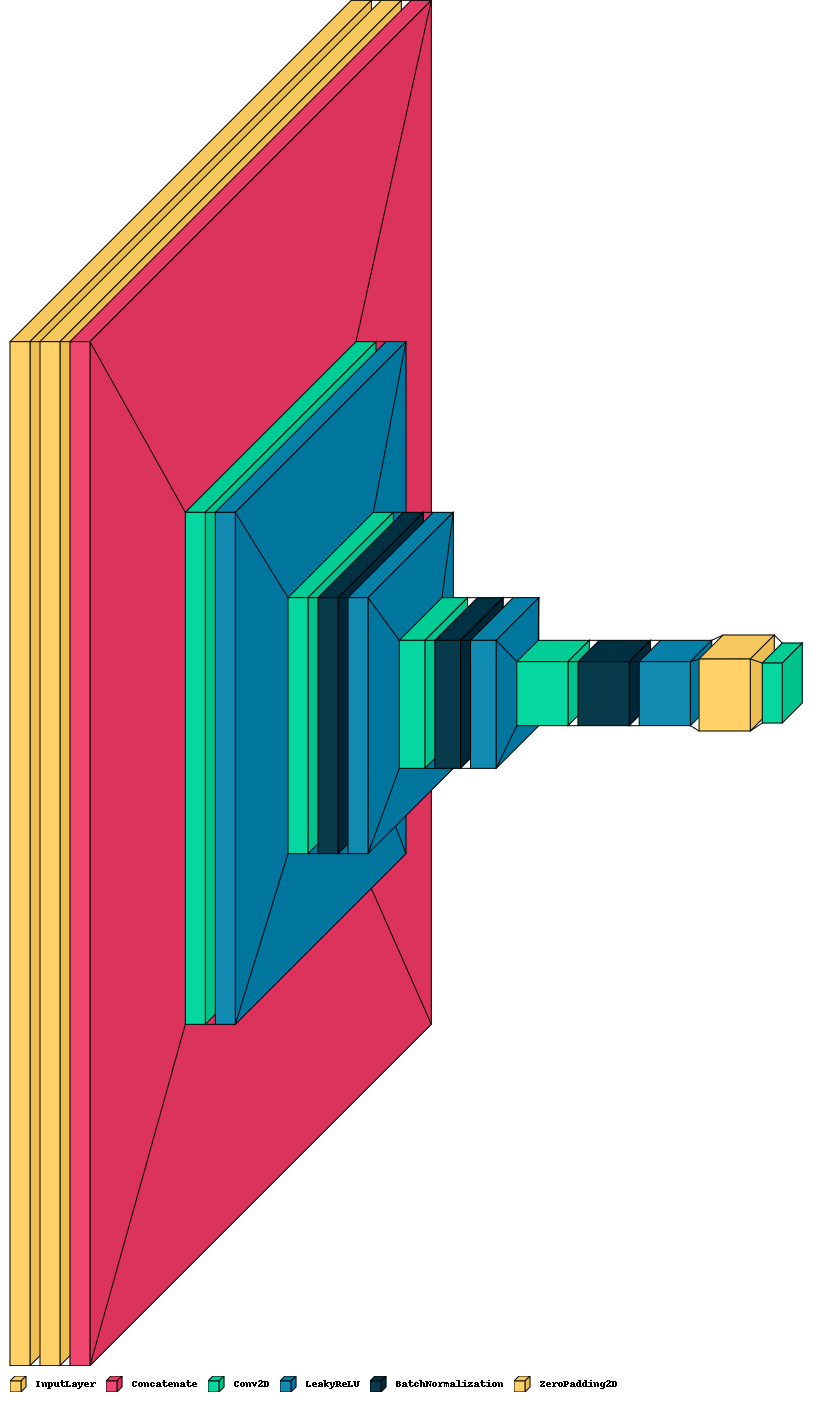

In [15]:
visualkeras.layered_view(discriminator,legend=True, to_file='/kaggle/working/discriminator_legend.png')

In [20]:
loss_object = keras.losses.BinaryCrossentropy(from_logits=True)

def generator_loss(disc_generated_output, gen_output, target):
    gan_loss = loss_object(tf.ones_like(disc_generated_output), disc_generated_output)
    l1_loss = tf.reduce_mean(tf.abs(target - gen_output))
    total_gen_loss = gan_loss + (100 * l1_loss)

    return total_gen_loss, gan_loss, l1_loss

def discriminator_loss(disc_real_output, disc_generated_output):
    real_loss = loss_object(tf.ones_like(disc_real_output), disc_real_output)
    generated_loss = loss_object(tf.zeros_like(disc_generated_output), disc_generated_output)
    total_disc_loss = real_loss + generated_loss
    return total_disc_loss

In [21]:
generator_opt = tf.keras.optimizers.Adam(2e-3, beta_1=0.9)
discriminator_opt = tf.keras.optimizers.Adam(2e-3, beta_1=0.9)

In [22]:
@tf.function()
def train_step(images, masks):
    images, masks = tf.cast(images, tf.float32), tf.cast(masks, tf.float32)

    with tf.GradientTape(persistent=True) as tape:

        # Fake generation
        gen_out = generator(images, training=True)
   
        # Discriminator
        dis_real = discriminator([images, masks], training=True)
        dis_fake = discriminator([images, gen_out], training=True)

        # Calculate Losses
        gen_loss = generator_loss(dis_fake, gen_out, masks)
        disc_loss = discriminator_loss(dis_real, dis_fake)

    # Calculate Gradients
    gen_grads = tape.gradient(gen_loss, generator.trainable_variables)
    dis_grads = tape.gradient(disc_loss, discriminator.trainable_variables)

    # Apply Gradients
    generator_opt.apply_gradients(zip(gen_grads, generator.trainable_variables))
    discriminator_opt.apply_gradients(zip(dis_grads, discriminator.trainable_variables))

### Train, Validation, and Test Data preparation

In [23]:
from sklearn.model_selection import train_test_split

train_images, test_images, train_masks, test_masks  =  train_test_split(images,masks, test_size=0.4, random_state=0)
#train_images, val_images, train_masks, val_masks  =  train_test_split(train_images,train_masks, test_size=0.25, random_state=0)

In [24]:
train_images.shape
#test_images.shape

(300, 256, 256, 3)

In [25]:
train_split = tf.data.Dataset.from_tensor_slices((train_images, train_masks)).batch(4)
#val_split = tf.data.Dataset.from_tensor_slices((val_images, val_masks)).batch(4)
test_split = tf.data.Dataset.from_tensor_slices((test_images, test_masks)).batch(4)

In [26]:
train_split

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float64, name=None), TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None))>

In [27]:
dice_coefficients_mean_train = []
dice_coefficients_std_train = []

dice_coefficients_mean_val = []
dice_coefficients_std_val = []

dice_coefficients_median_train = []
dice_coefficients_1stquantile_train = []
dice_coefficients_3rdquantile_train = []

dice_coefficients_median_val = []
dice_coefficients_1stquantile_val = []
dice_coefficients_3rdquantile_val = []


def fit(epochs=35, chunk=1):
    for epoch in tqdm(range(epochs),desc="Epochs"):
        for images, masks in train_split:
            train_step(images, masks)
        print('Train:')
        mean_dice_train, std_dice_train,median_dice_train,first_dice_train, third_dice_train = show_predictions_train(generator, 300, 3)
        dice_coefficients_mean_train.append(mean_dice_train)
        dice_coefficients_std_train.append(std_dice_train)
        dice_coefficients_median_train.append(median_dice_train)
        dice_coefficients_1stquantile_train.append(first_dice_train)
        dice_coefficients_3rdquantile_train.append(third_dice_train)

        
        print('------------------------------------------------------------------------------------')
        print('Test:')
        mean_dice_val, std_dice_val,median_dice_val,first_dice_val, third_dice_val = show_predictions_test(generator, 200, 1)
        dice_coefficients_mean_val.append(mean_dice_val)
        dice_coefficients_std_val.append(std_dice_val)
        dice_coefficients_median_val.append(median_dice_val)
        dice_coefficients_1stquantile_val.append(first_dice_val)
        dice_coefficients_3rdquantile_val.append(third_dice_val)
        

### Training
(The output has been deleted because it is too long, check the graph below.)

In [30]:
fit() # Train

Epochs:   0%|          | 0/35 [00:00<?, ?it/s]

Train:
1/1 [==============================] - 0s 24ms/step
Results from the training set. Mean +- STD: 0.6361587258185792 +- 0.06010676671515925, Median:0.6353138884445315 [0.5931440874822699,0.6801463372654156]
------------------------------------------------------------------------------------
Test:
1/1 [==============================] - 0s 24ms/step


Epochs:   3%|▎         | 1/35 [00:43<24:55, 43.98s/it]

Results from the test set. Mean +- STD: 0.638156757891156 +- 0.06996161992934723, Median:0.642441909924524 [0.5856732062815035,0.69354930758534]
Train:
1/1 [==============================] - 0s 23ms/step
Results from the training set. Mean +- STD: 0.9722577841794803 +- 0.009700565754610072, Median:0.9762808137431486 [0.9704097284588654,0.9778549562579426]
------------------------------------------------------------------------------------
Test:
1/1 [==============================] - 0s 31ms/step


Epochs:   6%|▌         | 2/35 [01:27<24:06, 43.84s/it]

Results from the test set. Mean +- STD: 0.9766366671642275 +- 0.010523687929107206, Median:0.9809960339758267 [0.9749988881263384,0.9829680784518166]
Train:
1/1 [==============================] - 0s 23ms/step
Results from the training set. Mean +- STD: 0.9800145670700737 +- 0.004594726580134681, Median:0.9814615231864798 [0.978869734291713,0.9828993618295612]
------------------------------------------------------------------------------------
Test:
1/1 [==============================] - 0s 27ms/step


Epochs:   9%|▊         | 3/35 [02:10<23:10, 43.45s/it]

Results from the test set. Mean +- STD: 0.9822584877539213 +- 0.004684020508488202, Median:0.9836236470335198 [0.9806016420706576,0.9855375457727976]
Train:
1/1 [==============================] - 0s 23ms/step
Results from the training set. Mean +- STD: 0.5817913151282273 +- 0.06379641610722289, Median:0.5813748194153481 [0.5363993707127349,0.6268250151234923]
------------------------------------------------------------------------------------
Test:
1/1 [==============================] - 0s 25ms/step


Epochs:  11%|█▏        | 4/35 [02:53<22:20, 43.23s/it]

Results from the test set. Mean +- STD: 0.5817723442383527 +- 0.07041567209091026, Median:0.5824649646346265 [0.5307294464275909,0.6297764601069142]
Train:
1/1 [==============================] - 0s 25ms/step
Results from the training set. Mean +- STD: 0.942766444055261 +- 0.02201785839938361, Median:0.9484535520637598 [0.9348084658036139,0.9576898065361089]
------------------------------------------------------------------------------------
Test:
1/1 [==============================] - 0s 30ms/step


Epochs:  14%|█▍        | 5/35 [03:36<21:38, 43.29s/it]

Results from the test set. Mean +- STD: 0.9468635512655004 +- 0.02084368515853214, Median:0.9520616606471595 [0.9376648939630519,0.9614415867618896]
Train:
1/1 [==============================] - 0s 25ms/step
Results from the training set. Mean +- STD: 0.9857264845146418 +- 0.002892768381897328, Median:0.9864349503365759 [0.984068430997988,0.9878186997627413]
------------------------------------------------------------------------------------
Test:
1/1 [==============================] - 0s 25ms/step


Epochs:  17%|█▋        | 6/35 [04:21<21:06, 43.66s/it]

Results from the test set. Mean +- STD: 0.9858956587672499 +- 0.003054466213373566, Median:0.9863673213795013 [0.9840931829304731,0.9878399353938245]
Train:
1/1 [==============================] - 0s 27ms/step
Results from the training set. Mean +- STD: 0.9856095655201326 +- 0.0025977472433590682, Median:0.9863137909710145 [0.9843512044862917,0.987396466946593]
------------------------------------------------------------------------------------
Test:
1/1 [==============================] - 0s 24ms/step


Epochs:  20%|██        | 7/35 [05:04<20:15, 43.41s/it]

Results from the test set. Mean +- STD: 0.9851183337400681 +- 0.0035077499283567913, Median:0.9859951806140829 [0.9832093624791194,0.9876408087649035]
Train:
1/1 [==============================] - 0s 25ms/step
Results from the training set. Mean +- STD: 0.9857794497470964 +- 0.002697765700535014, Median:0.9864489425062146 [0.9846910544479048,0.9877110813222437]
------------------------------------------------------------------------------------
Test:
1/1 [==============================] - 0s 24ms/step


Epochs:  23%|██▎       | 8/35 [05:46<19:26, 43.19s/it]

Results from the test set. Mean +- STD: 0.9849070580175251 +- 0.003863707573331371, Median:0.9857856547225408 [0.9833426986617869,0.9877456385848413]
Train:
1/1 [==============================] - 0s 25ms/step
Results from the training set. Mean +- STD: 0.9874076014578831 +- 0.0018772487558281399, Median:0.9877397060355593 [0.9866013534301701,0.9887768114399788]
------------------------------------------------------------------------------------
Test:
1/1 [==============================] - 0s 23ms/step


Epochs:  26%|██▌       | 9/35 [06:32<18:59, 43.82s/it]

Results from the test set. Mean +- STD: 0.9864818728873692 +- 0.0024458098185613348, Median:0.9869683681559975 [0.9851115126163404,0.9881217859863183]
Train:
1/1 [==============================] - 0s 24ms/step
Results from the training set. Mean +- STD: 0.9893729262286713 +- 0.0018204868721455713, Median:0.9898039421652917 [0.9885483172231785,0.9906190042997605]
------------------------------------------------------------------------------------
Test:
1/1 [==============================] - 0s 25ms/step


Epochs:  29%|██▊       | 10/35 [07:14<18:05, 43.40s/it]

Results from the test set. Mean +- STD: 0.9883456099319732 +- 0.002632655689546052, Median:0.9890856775676509 [0.986874248989341,0.9902598835802803]
Train:
1/1 [==============================] - 0s 24ms/step
Results from the training set. Mean +- STD: 0.9845104168137683 +- 0.0029121197289121593, Median:0.985145154653119 [0.983268534440304,0.9864872944545361]
------------------------------------------------------------------------------------
Test:
1/1 [==============================] - 0s 24ms/step


Epochs:  31%|███▏      | 11/35 [07:57<17:17, 43.21s/it]

Results from the test set. Mean +- STD: 0.98328438325276 +- 0.0044769438514242555, Median:0.9845745865820645 [0.9815590529594473,0.9863991444096203]
Train:
1/1 [==============================] - 0s 24ms/step
Results from the training set. Mean +- STD: 0.9833763298280924 +- 0.003966076367468214, Median:0.9841634211702581 [0.9818190041063587,0.985974222683347]
------------------------------------------------------------------------------------
Test:
1/1 [==============================] - 0s 23ms/step


Epochs:  34%|███▍      | 12/35 [08:40<16:33, 43.20s/it]

Results from the test set. Mean +- STD: 0.9817667687856974 +- 0.005661265946518835, Median:0.9831709069692043 [0.9796913248199149,0.9856010870905404]
Train:
1/1 [==============================] - 0s 24ms/step
Results from the training set. Mean +- STD: 0.9861998171286711 +- 0.0030263925943706457, Median:0.9869161388894196 [0.9851358274046204,0.988279588130108]
------------------------------------------------------------------------------------
Test:
1/1 [==============================] - 0s 27ms/step


Epochs:  37%|███▋      | 13/35 [09:22<15:44, 42.91s/it]

Results from the test set. Mean +- STD: 0.9848951139565634 +- 0.004236034955518125, Median:0.9859577213151629 [0.983039052255827,0.9878732718059333]
Train:
1/1 [==============================] - 0s 24ms/step
Results from the training set. Mean +- STD: 0.9861276614265319 +- 0.002994236811052648, Median:0.9866323850404854 [0.9843611901707446,0.9882931322109518]
------------------------------------------------------------------------------------
Test:
1/1 [==============================] - 0s 24ms/step


Epochs:  40%|████      | 14/35 [10:05<14:57, 42.74s/it]

Results from the test set. Mean +- STD: 0.9854149962844719 +- 0.003142013791254574, Median:0.9856050532328859 [0.9837597549252812,0.9875125020081625]
Train:
1/1 [==============================] - 0s 24ms/step
Results from the training set. Mean +- STD: 0.980152896708912 +- 0.004913698842122538, Median:0.9812232037842 [0.978611968873037,0.9831957342052806]
------------------------------------------------------------------------------------
Test:
1/1 [==============================] - 0s 24ms/step


Epochs:  43%|████▎     | 15/35 [10:49<14:26, 43.30s/it]

Results from the test set. Mean +- STD: 0.9780763051982609 +- 0.007840818239156545, Median:0.9798234789507183 [0.9766767889213875,0.9828507252307875]
Train:
1/1 [==============================] - 0s 24ms/step
Results from the training set. Mean +- STD: 0.9908576680481985 +- 0.0014604353577858651, Median:0.9912426701431434 [0.9901773287620493,0.99181769721881]
------------------------------------------------------------------------------------
Test:
1/1 [==============================] - 0s 24ms/step


Epochs:  46%|████▌     | 16/35 [11:32<13:38, 43.09s/it]

Results from the test set. Mean +- STD: 0.9893916191055309 +- 0.002249034157679528, Median:0.9898812493338036 [0.9880108180661673,0.9909207957821968]
Train:
1/1 [==============================] - 0s 26ms/step
Results from the training set. Mean +- STD: 0.9903804834501319 +- 0.0016045162834323638, Median:0.9906806624789308 [0.9894973010362457,0.9916007220556959]
------------------------------------------------------------------------------------
Test:
1/1 [==============================] - 0s 25ms/step


Epochs:  49%|████▊     | 17/35 [12:15<12:55, 43.06s/it]

Results from the test set. Mean +- STD: 0.9889524493657071 +- 0.0021225082886782848, Median:0.9892215201131026 [0.9878956322002381,0.9902466177195517]
Train:
1/1 [==============================] - 0s 24ms/step
Results from the training set. Mean +- STD: 0.9527197906925045 +- 0.019034789120548158, Median:0.9578409557300134 [0.946528997597186,0.9648885767121079]
------------------------------------------------------------------------------------
Test:
1/1 [==============================] - 0s 24ms/step


Epochs:  51%|█████▏    | 18/35 [13:00<12:24, 43.81s/it]

Results from the test set. Mean +- STD: 0.9483880937362223 +- 0.02675852037315822, Median:0.9570842227545886 [0.9435665446289658,0.9639373894296086]
Train:
1/1 [==============================] - 0s 24ms/step
Results from the training set. Mean +- STD: 0.9909735072080148 +- 0.0014629188509486264, Median:0.9913119533368775 [0.9901734034525246,0.9919870171101637]
------------------------------------------------------------------------------------
Test:
1/1 [==============================] - 0s 24ms/step


Epochs:  54%|█████▍    | 19/35 [13:44<11:37, 43.59s/it]

Results from the test set. Mean +- STD: 0.9893490473839835 +- 0.002103071537079336, Median:0.9895894349804726 [0.9882582052815345,0.9908484101385138]
Train:
1/1 [==============================] - 0s 24ms/step
Results from the training set. Mean +- STD: 0.9897515732019374 +- 0.0017761546257243344, Median:0.9900180586263269 [0.9887177597011395,0.9910316862743015]
------------------------------------------------------------------------------------
Test:
1/1 [==============================] - 0s 25ms/step


Epochs:  57%|█████▋    | 20/35 [14:28<10:59, 43.95s/it]

Results from the test set. Mean +- STD: 0.9883258012149406 +- 0.0021380894632720263, Median:0.988420280124918 [0.9870957623611346,0.9899091546977482]
Train:
1/1 [==============================] - 0s 24ms/step
Results from the training set. Mean +- STD: 0.9852989469745727 +- 0.0031208776997236876, Median:0.9857063160649893 [0.983834471296487,0.9873473408170004]
------------------------------------------------------------------------------------
Test:
1/1 [==============================] - 0s 25ms/step


Epochs:  60%|██████    | 21/35 [15:12<10:14, 43.92s/it]

Results from the test set. Mean +- STD: 0.9842486845935445 +- 0.0032743421838586223, Median:0.9845234506128497 [0.982542843266849,0.9862620888500305]
Train:
1/1 [==============================] - 0s 25ms/step
Results from the training set. Mean +- STD: 0.9909670837680948 +- 0.0012849198710125726, Median:0.9911320326834143 [0.9903041036630404,0.9919670104799143]
------------------------------------------------------------------------------------
Test:
1/1 [==============================] - 0s 26ms/step


Epochs:  63%|██████▎   | 22/35 [15:56<09:28, 43.77s/it]

Results from the test set. Mean +- STD: 0.9891511819473007 +- 0.002038731227589547, Median:0.9894139917702851 [0.9879536586841466,0.99062516048715]
Train:
1/1 [==============================] - 0s 28ms/step
Results from the training set. Mean +- STD: 0.9890486354382574 +- 0.00154915114724802, Median:0.9892656418784498 [0.9882211730732033,0.9902127054622794]
------------------------------------------------------------------------------------
Test:
1/1 [==============================] - 0s 25ms/step


Epochs:  66%|██████▌   | 23/35 [16:40<08:47, 43.97s/it]

Results from the test set. Mean +- STD: 0.9874952143639771 +- 0.0019823951749168493, Median:0.9875774060410822 [0.9861599756142034,0.9889019921820518]
Train:
1/1 [==============================] - 0s 24ms/step
Results from the training set. Mean +- STD: 0.9881856709089785 +- 0.00219778205070567, Median:0.9887479268593858 [0.9872222737250413,0.9897157149672202]
------------------------------------------------------------------------------------
Test:
1/1 [==============================] - 0s 25ms/step


Epochs:  69%|██████▊   | 24/35 [17:23<08:00, 43.67s/it]

Results from the test set. Mean +- STD: 0.9863935382549086 +- 0.0035150109502083767, Median:0.9872910182637409 [0.9846255981679777,0.9887407256222792]
Train:
1/1 [==============================] - 0s 24ms/step
Results from the training set. Mean +- STD: 0.9902910657530246 +- 0.001570325544562419, Median:0.9906482631887188 [0.9894096123197866,0.9913870990190935]
------------------------------------------------------------------------------------
Test:
1/1 [==============================] - 0s 24ms/step


Epochs:  71%|███████▏  | 25/35 [18:05<07:13, 43.30s/it]

Results from the test set. Mean +- STD: 0.988420370726976 +- 0.0023140386132611125, Median:0.9887828148413738 [0.9871051556928494,0.9900349333850388]
Train:
1/1 [==============================] - 0s 23ms/step
Results from the training set. Mean +- STD: 0.9904359003488912 +- 0.0016305419099847368, Median:0.9908315676893465 [0.9896308015162102,0.9916358224649877]
------------------------------------------------------------------------------------
Test:
1/1 [==============================] - 0s 32ms/step


Epochs:  74%|███████▍  | 26/35 [18:50<06:34, 43.82s/it]

Results from the test set. Mean +- STD: 0.9884802651445207 +- 0.002455711581989779, Median:0.9889200239436746 [0.9869611383295198,0.9901676089950606]
Train:
1/1 [==============================] - 0s 24ms/step
Results from the training set. Mean +- STD: 0.9928660574633141 +- 0.001104593837462203, Median:0.9930940375525441 [0.9922912126223483,0.9936491939195946]
------------------------------------------------------------------------------------
Test:
1/1 [==============================] - 0s 24ms/step


Epochs:  77%|███████▋  | 27/35 [19:34<05:49, 43.64s/it]

Results from the test set. Mean +- STD: 0.9906179538115961 +- 0.0019634496050707803, Median:0.9910335439403073 [0.9894151496467188,0.9919404316105082]
Train:
1/1 [==============================] - 0s 26ms/step
Results from the training set. Mean +- STD: 0.9918753842120206 +- 0.0012768200908757825, Median:0.9921403459983327 [0.9912054209512947,0.9927132495747751]
------------------------------------------------------------------------------------
Test:
1/1 [==============================] - 0s 25ms/step


Epochs:  80%|████████  | 28/35 [20:16<05:03, 43.35s/it]

Results from the test set. Mean +- STD: 0.9895939020515285 +- 0.0022314531691559497, Median:0.9900396531334517 [0.988226853923986,0.9913044165096128]
Train:
1/1 [==============================] - 0s 24ms/step
Results from the training set. Mean +- STD: 0.9912509075530445 +- 0.0012546021772998333, Median:0.9914530902361811 [0.9905334574790741,0.9921471889107815]
------------------------------------------------------------------------------------
Test:
1/1 [==============================] - 0s 32ms/step


Epochs:  83%|████████▎ | 29/35 [21:01<04:21, 43.62s/it]

Results from the test set. Mean +- STD: 0.9892188753843659 +- 0.0019277341875122433, Median:0.9894942523343917 [0.9882020128209449,0.9905890132110923]
Train:
1/1 [==============================] - 0s 25ms/step
Results from the training set. Mean +- STD: 0.9917893090048824 +- 0.0012962225308374286, Median:0.9921582494058474 [0.9910624814689301,0.9927038315387731]
------------------------------------------------------------------------------------
Test:
1/1 [==============================] - 0s 24ms/step


Epochs:  86%|████████▌ | 30/35 [21:43<03:36, 43.33s/it]

Results from the test set. Mean +- STD: 0.9895634193918186 +- 0.0021856505390626195, Median:0.9899405236066874 [0.9882516396536987,0.9911240602696735]
Train:
1/1 [==============================] - 0s 23ms/step
Results from the training set. Mean +- STD: 0.9899510512623991 +- 0.0017122431791376652, Median:0.9903680906718202 [0.9890839348514853,0.9911322970901284]
------------------------------------------------------------------------------------
Test:
1/1 [==============================] - 0s 23ms/step


Epochs:  89%|████████▊ | 31/35 [22:25<02:51, 42.83s/it]

Results from the test set. Mean +- STD: 0.9879405007767232 +- 0.0026370619775712345, Median:0.9885234423934158 [0.9864969288882928,0.9898004997658074]
Train:
1/1 [==============================] - 0s 29ms/step
Results from the training set. Mean +- STD: 0.9921396010958832 +- 0.0011545957713894432, Median:0.9923612022084091 [0.9914949326737186,0.9930209506561009]
------------------------------------------------------------------------------------
Test:
1/1 [==============================] - 0s 23ms/step


Epochs:  91%|█████████▏| 32/35 [23:08<02:08, 42.92s/it]

Results from the test set. Mean +- STD: 0.9898298563149762 +- 0.0019963668348585567, Median:0.9902553672573635 [0.9886025989118012,0.9912661857208581]
Train:
1/1 [==============================] - 0s 24ms/step
Results from the training set. Mean +- STD: 0.9929822175068175 +- 0.0011079548829912272, Median:0.9931912499381739 [0.9924068548438819,0.9937533786334997]
------------------------------------------------------------------------------------
Test:
1/1 [==============================] - 0s 24ms/step


Epochs:  94%|█████████▍| 33/35 [23:49<01:24, 42.45s/it]

Results from the test set. Mean +- STD: 0.9905990399576515 +- 0.0020884456834841456, Median:0.9909705678168375 [0.9894170668243728,0.9920521033466185]
Train:
1/1 [==============================] - 0s 23ms/step
Results from the training set. Mean +- STD: 0.9927690033586885 +- 0.0013323326952031501, Median:0.9931277007119065 [0.9921951910686302,0.993687950742179]
------------------------------------------------------------------------------------
Test:
1/1 [==============================] - 0s 23ms/step


Epochs:  97%|█████████▋| 34/35 [24:31<00:42, 42.16s/it]

Results from the test set. Mean +- STD: 0.9902242345214276 +- 0.0023364471340792366, Median:0.9907492703755515 [0.9889506501467065,0.9919356201967934]
Train:
1/1 [==============================] - 0s 22ms/step
Results from the training set. Mean +- STD: 0.9926402670337537 +- 0.0011795531414184241, Median:0.9928060054635354 [0.9920617216154572,0.9934625199844064]
------------------------------------------------------------------------------------
Test:
1/1 [==============================] - 0s 23ms/step


Epochs: 100%|██████████| 35/35 [25:13<00:00, 43.25s/it]

Results from the test set. Mean +- STD: 0.9901829266223788 +- 0.0020242242339780165, Median:0.9905222387765481 [0.9890193323118612,0.9915684936564595]


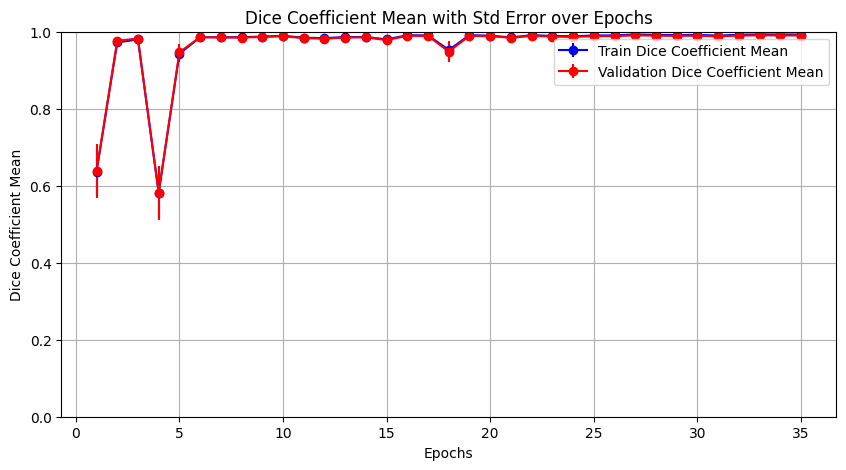

In [31]:
# Plot the results with error bars
epochs_range = range(1, 35 + 1)
plt.figure(figsize=(10, 5))
plt.ylim(0,1)
# Plot the mean with error bars representing std
plt.errorbar(epochs_range, dice_coefficients_mean_train, yerr=dice_coefficients_std_train, fmt='-o', label='Train Dice Coefficient Mean', color='blue')
plt.errorbar(epochs_range, dice_coefficients_mean_val, yerr=dice_coefficients_std_val, fmt='-o', label='Validation Dice Coefficient Mean', color='red')

plt.title('Dice Coefficient Mean with Std Error over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Dice Coefficient Mean')
plt.legend()
plt.grid(True)
plt.show()

## Validation

In [33]:
show_predictions_test(generator, n_images=200,n_images_disp = 5)

1/1 [==============================] - 0s 24ms/step
Results from the test set. Mean +- STD: 0.9901829266223788 +- 0.0020242242339780165, Median:0.9905222387765481 [0.9890193323118612,0.9915684936564595]


(0.9901829266223788,
 0.0020242242339780165,
 0.9905222387765481,
 0.9890193323118612,
 0.9915684936564595)

# Dynamic Training using Hold-Out technique

We will like to evaluate how much data is required in order to train the model and still acceptable results.

In [ ]:
# Optimized Model

generator_opt = tf.keras.optimizers.Adam(2e-3, beta_1=0.5)
discriminator_opt = tf.keras.optimizers.Adam(2e-3, beta_1=0.5)

@tf.function()
def train_step(images, masks):
    images, masks = tf.cast(images, tf.float32), tf.cast(masks, tf.float32)

    with tf.GradientTape(persistent=True) as tape:

        # Fake generation
        gen_out = generator(images, training=True)
   
        # Discriminator
        dis_real = discriminator([images, masks], training=True)
        dis_fake = discriminator([images, gen_out], training=True)

        # Calculate Losses
        gen_loss = generator_loss(dis_fake, gen_out, masks)
        disc_loss = discriminator_loss(dis_real, dis_fake)

    # Calculate Gradients
    gen_grads = tape.gradient(gen_loss, generator.trainable_variables)
    dis_grads = tape.gradient(disc_loss, discriminator.trainable_variables)

    # Apply Gradients
    generator_opt.apply_gradients(zip(gen_grads, generator.trainable_variables))
    discriminator_opt.apply_gradients(zip(dis_grads, discriminator.trainable_variables))


            
# Define a range of test_size values to iterate over
test_size_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]



# Iterate over different test_size values
for test_size in test_size_values:
        # Split the data into training and testing sets

    class Encoder(Layer):

        def __init__(self, filters, apply_norm=True, **kwargs):
            super(Encoder, self).__init__(**kwargs)

            self.filters = filters
            self.apply_norm = apply_norm

            self.c1 = Conv2D(filters, kernel_size=3, strides=2, padding='same', kernel_initializer='he_normal')
            self.bn = BatchNormalization()
            self.act = LeakyReLU()

        def call(self, X):
            x = self.c1(X)
            if self.apply_norm :
                x = self.bn(x)
            x = self.act(x)
            return x

        def get_config(self):
            base_config = super().get_config()
            return {
                **base_config,
                "filters":self.filters,
                "apply_norm":self.apply_norm
            }

    class Decoder(Layer):

        def __init__(self, filters, apply_dropout=False, **kwargs):
            super(Decoder, self).__init__(**kwargs)

            self.filters = filters
            self.apply_dropout = apply_dropout

            self.cT = Conv2DTranspose(filters, kernel_size=3, strides=2, padding='same', kernel_initializer='he_normal')
            self.bn = BatchNormalization()
            self.drop = Dropout(0.5)
            self.act = ReLU()


        def call(self, X):
            x = self.cT(X)
            x = self.bn(x)
            if self.apply_dropout:
                x = self.drop(x)
            x = self.act(x)
            return x

        def get_config(self):
            base_config = super().get_config()
            return {
                **base_config,
                "filters":self.filters,
                "apply_dropout":self.apply_dropout
            }


    # Inputs
    gen_input = Input(shape=(256,256,3), name="Input")

    # Encoder - Downsampling Phase
    c1 = Encoder(64, apply_norm=False, name="Encoder1")(gen_input)
    c2 = Encoder(128, name="Encoder2")(c1)
    c3 = Encoder(256, name="Encoder3")(c2)
    c4 = Encoder(512, name="Encoder4")(c3)
    c5 = Encoder(512, name="Encoder5")(c4)
    c6 = Encoder(512, name="Encoder6")(c5)

    # Encoding - Latent Representation
    e = Encoder(512, name="Encoding")(c6)

    #  Attention plus decoder network.
    d1 = Decoder(512,apply_dropout=True,name="Decoder1")(e)
    a1 = concatenate([d1, c6])

    d2 = Decoder(512,apply_dropout=True,name="Decoder2")(a1)
    a2 = concatenate([d2, c5])

    d3 = Decoder(512,apply_dropout=True,name="Decoder3")(a2)
    a3 = concatenate([d3, c4])

    d4 = Decoder(512, name="Decoder4")(a3)
    a4 = concatenate([d4, c3])

    d5 = Decoder(256, name="Decoder5")(a4)
    a5 = concatenate([d5, c2])

    d6 = Decoder(128, name="Decoder6")(a5)
    a6 = concatenate([d6, c1])

    d7 = Decoder(64, name="Decoder7")(a6)

    init = tf.random_normal_initializer(stddev=0.02)
    gen_out = Conv2D(3, kernel_size=1, strides=1, padding='same', activation='tanh', kernel_initializer=init, name="gen_out")(d7)

    # Model
    generator = Model(
        inputs=gen_input,
        outputs=gen_out,
        name="Generator"
    )

    # Compiling
    generator.compile(
        loss='binary_crossentropy',
        optimizer='adam'
    )

    class ZeroPaddingBlock(Layer):

        def __init__(self, **kwargs):
            super(ZeroPaddingBlock, self).__init__(**kwargs)

            init = tf.random_normal_initializer(stddev=0.02)
            self.z1 = ZeroPadding2D()
            self.c = Conv2DTranspose(512, kernel_size=4, padding='valid', kernel_initializer=init, strides=1, use_bias=False)
            self.bn = BatchNormalization()
            self.act = LeakyReLU()
            self.z2 = ZeroPadding2D()

        def call(self, X):
            x = self.z1(X)
            x = self.c(x)
            x = self.bn(x)
            x = self.act(x)
            x = self.z2(x)
            return x

    # Kernel Initializer
    init = tf.random_normal_initializer(stddev=0.02)

    # Inputs
    src_img = Input(shape=(256,256,3), name="SourceImage")
    gen_img = Input(shape=(256,256,3), name="GenImage")

    # Join Inputs
    x = concatenate([src_img, gen_img])

    # Network
    x = Encoder(64, apply_norm=False, name="Block1")(x)
    x = Encoder(128, name="Block2")(x)
    x = Encoder(256, name="Block3")(x)
    x = Encoder(512, name="Block4")(x)
    x = ZeroPaddingBlock(name="Block5")(x)
    patch_out = Conv2D(1, kernel_size=4, strides=1, padding='valid', kernel_initializer=init)(x)

    # Discriminator
    discriminator = Model(
        inputs=[src_img, gen_img],
        outputs=[patch_out],
        name="Discriminator"
    )
    
    
    loss_object = keras.losses.BinaryCrossentropy(from_logits=True)

    def generator_loss(disc_generated_output, gen_output, target):
        gan_loss = loss_object(tf.ones_like(disc_generated_output), disc_generated_output)
        l1_loss = tf.reduce_mean(tf.abs(target - gen_output))
        total_gen_loss = gan_loss + (100 * l1_loss)

        return total_gen_loss, gan_loss, l1_loss

    def discriminator_loss(disc_real_output, disc_generated_output):
        real_loss = loss_object(tf.ones_like(disc_real_output), disc_real_output)
        generated_loss = loss_object(tf.zeros_like(disc_generated_output), disc_generated_output)
        total_disc_loss = real_loss + generated_loss
        return total_disc_loss

    
    
    
    generator_opt = tf.keras.optimizers.Adam(2e-3, beta_1=0.5)
    discriminator_opt = tf.keras.optimizers.Adam(2e-3, beta_1=0.5)

        # Images
    total_imagenes = len(train_images)

    train_size = int(test_size * total_imagenes)

    # Índexes
    indices = np.arange(total_imagenes)

    # train indexes
    train_indices = indices[:train_size]
    # split
    train_set = [train_images[i] for i in train_indices]
  



    # Labels
    total_labels = len(train_masks)

    train_size_labels = int(test_size * total_labels)
    

    indices_labels = np.arange(total_labels)

    train_indices_labels = indices_labels[:train_size_labels]



    train_set_labels = [masks[i] for i in train_indices_labels]

    # Merge labels and images
    train_ds = tf.data.Dataset.from_tensor_slices((train_set, train_set_labels)).shuffle(1000).batch(4)


    def fit(epochs=20, chunk=4):
        for epoch in tqdm(range(epochs),desc="Epochs"):
            for images, masks in train_ds:
                train_step(images, masks)
    
    fit() # Train

    print(f'Test Size: {test_size}')
    
    show_predictions_test(generator, 50,50)